In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [4]:
# !pip3 install --upgrade plotly

In [5]:
# df_length = len(df)

# df1 = df.iloc[:df_length//2]
# df2 = df.iloc[df_length//2:]

# df1.to_csv('eda_2018_part1.csv', index=False)
# df2.to_csv('eda_2018_part2.csv', index=False)

# Post-merge EDA

In [13]:
df = pd.read_csv("../scripts/eda_2018.csv")
df.head()

In [ ]:
df.columns

In [ ]:
print(df.shape)
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
print(df.shape)
df.head()

In [ ]:
threshold = 3
col = 'Departure Delay'

z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
df = df.loc[z_scores < threshold]
df.shape

In [ ]:
print(df[col].max())
print(df[col].mean())
print(df[col].median())
print(df[col].min())

In [2]:
df1 = pd.read_csv("../scripts/eda_2018_part1.csv")
df1.head()

C:\Users\genev\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Carrier Code,Flight Num,Departure Time,Origin,Destination,Distance,Departure Delay,Carrier Delay,Weather Delay,...,Destination Shortwave Radiation,Destination Precipitation,Destination Rain,Destination Snowfall,Destination Precipitation Hours,Destination Windspeed,Destination Windgusts,Destination Wind Direction,Destination Evapotranspiration,Is Holiday
0,2018-01-01,United Airlines,2429,1517,EWR,DEN,1605.0,-5.0,0.0,0.0,...,10.04,0.0,0.0,0.0,0.0,11.5,18.7,68.0,0.83,New Year's Day
1,2018-01-01,United Airlines,2427,1115,LAS,SFO,414.0,-8.0,0.0,0.0,...,8.02,0.0,0.0,0.0,0.0,8.1,15.1,354.0,1.05,New Year's Day
2,2018-01-01,United Airlines,2426,1335,SNA,DEN,846.0,-5.0,0.0,0.0,...,10.04,0.0,0.0,0.0,0.0,11.5,18.7,68.0,0.83,New Year's Day
3,2018-01-01,United Airlines,2425,1546,RSW,ORD,1120.0,6.0,0.0,0.0,...,7.89,0.0,0.0,0.0,0.0,20.3,38.5,287.0,0.40,New Year's Day
4,2018-01-01,United Airlines,2422,2241,ORD,OMA,416.0,3.0,0.0,0.0,...,10.09,0.0,0.0,0.0,0.0,11.2,17.3,300.0,0.20,New Year's Day


In [3]:
df2 = pd.read_csv("../scripts/eda_2018_part2.csv")
df2.head()

C:\Users\genev\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Carrier Code,Flight Num,Departure Time,Origin,Destination,Distance,Departure Delay,Carrier Delay,Weather Delay,...,Destination Shortwave Radiation,Destination Precipitation,Destination Rain,Destination Snowfall,Destination Precipitation Hours,Destination Windspeed,Destination Windgusts,Destination Wind Direction,Destination Evapotranspiration,Is Holiday
0,2018-07-04,Delta Airlines,2037,1338,JFK,AUS,1521.0,3.0,0.0,0.0,...,12.76,29.6,29.6,0.0,11.0,15.5,29.9,156.0,3.43,4th of July
1,2018-07-04,Delta Airlines,2039,1500,BOS,ATL,946.0,-6.0,0.0,0.0,...,23.59,0.3,0.3,0.0,3.0,16.7,45.0,77.0,4.95,4th of July
2,2018-07-04,Delta Airlines,2040,757,DFW,LAX,1235.0,0.0,0.0,0.0,...,29.68,0.0,0.0,0.0,0.0,12.6,33.8,195.0,5.90,4th of July
3,2018-07-04,Delta Airlines,2047,1432,ATL,TPA,406.0,12.0,0.0,0.0,...,17.94,6.6,6.6,0.0,7.0,15.9,26.6,68.0,3.87,4th of July
4,2018-07-04,Delta Airlines,2047,1655,TPA,ATL,406.0,80.0,2.0,8.0,...,23.59,0.3,0.3,0.0,3.0,16.7,45.0,77.0,4.95,4th of July


In [23]:
data = [df1, df2]
df = pd.concat(data)
df.shape

(6681159, 58)

## Creating Outcome Column

In [24]:
df['Departure Delay'] = df['Departure Delay'] - df['NAS Delay'] - df['Security Delay']

In [25]:
departure_delay_df = df['Departure Delay'].reset_index()
departure_delay_df.drop('index', axis=1, inplace=True)
departure_delay_df.head()

,Departure Delay
0,-5.0
1,-8.0
2,-5.0
3,6.0
4,3.0


In [26]:
print(departure_delay_df.min())
print(departure_delay_df.max())
print(departure_delay_df.mean())
print(departure_delay_df.std())

Departure Delay   -72.0
dtype: float64
Departure Delay    2710.0
dtype: float64
Departure Delay    9.970617
dtype: float64
Departure Delay    44.45449
dtype: float64


# EDA (Gen)

### Correlation of Features

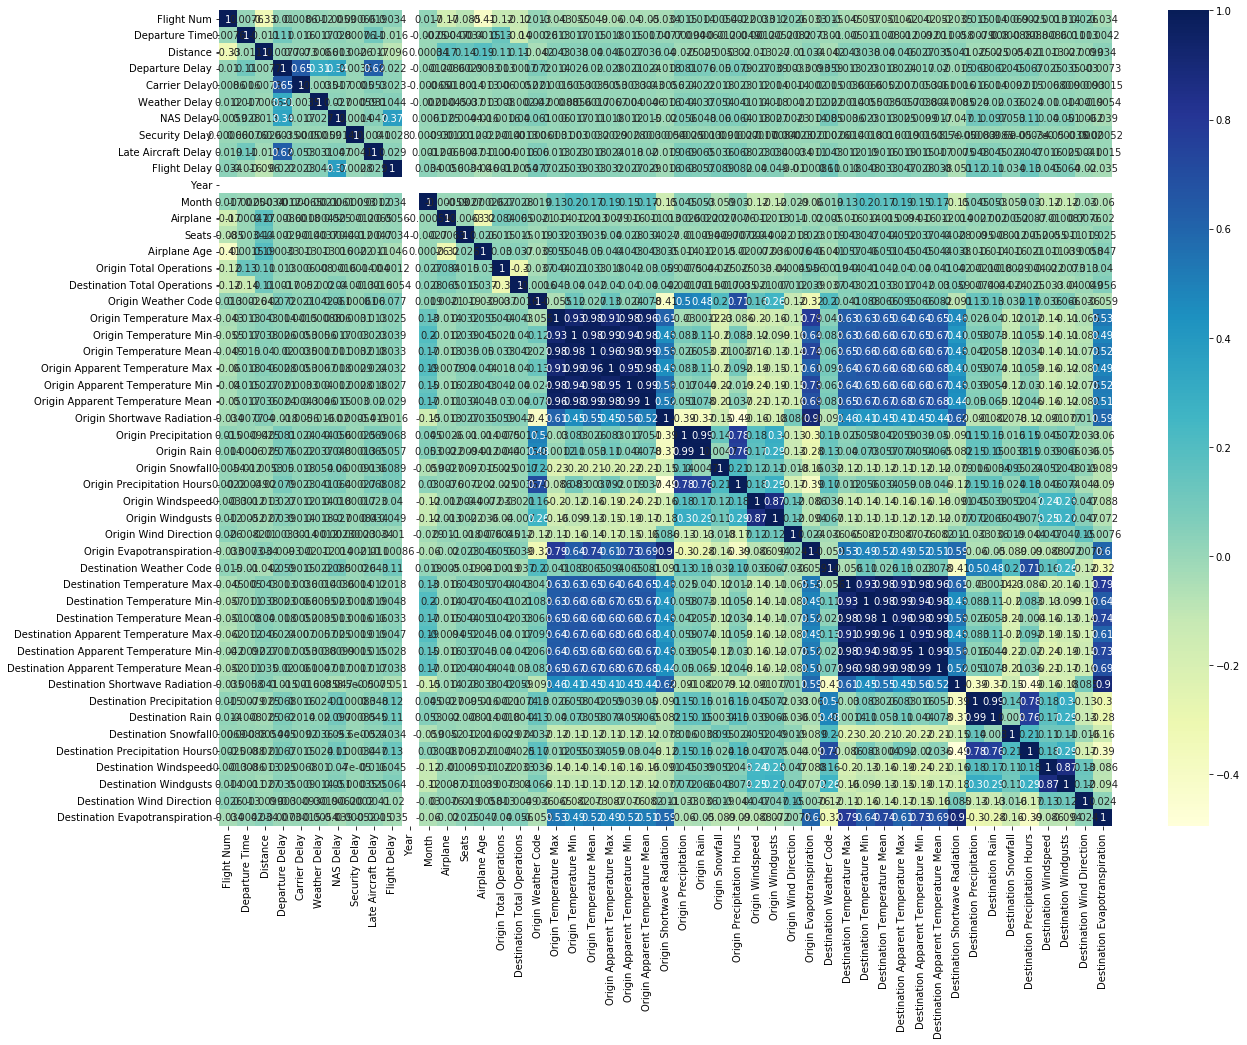

In [27]:
cor=df.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,cmap="YlGnBu", ax=ax)

In [28]:
# Delay Types
delay_df = df[['Departure Delay','Carrier Delay','Weather Delay', 'NAS Delay','Security Delay','Late Aircraft Delay', 'Flight Delay']]
fig = px.imshow(delay_df.corr(), text_auto=True, color_continuous_scale='deep')
fig.update_xaxes(title_text="Correlation of Delays")
fig.show()
# departure delay highly correlated to carrier delay, NAS delay, weather delay
# flight delay slightly correlated with security delay

In [29]:
# pie chart for no. of flights per airline 
airline_df = df.groupby('Carrier Code').count()['Flight Num']

fig = go.Figure()
fig.add_trace(go.Pie(labels=airline_df.index, values=airline_df.values, textinfo='label+percent'))
fig.update_layout(title='Proportion of Flights per Airline', height=550)
fig.show()

In [30]:
# pie chart for mean departure delay for all airlines
airline_df = df.groupby('Carrier Code').mean()['Departure Delay']

fig = go.Figure()
fig.add_trace(go.Pie(labels=airline_df.index, values=airline_df.values, textinfo='label+percent'))
fig.update_layout(title='Proportion of Mean Delay per Airline', height=550)
fig.show()

In [31]:
def get_range(x):
    ranges = [x.mean() - 3 * x.std(), x.mean() + 3 * x.std()]
    return ranges

In [32]:
dept_df = df['Departure Delay']
ranges = get_range(dept_df)
overall_mean = dept_df[(dept_df >= ranges[0]) & (dept_df<=ranges[1])].mean()

In [33]:
df['Departure Delay'].mean()

9.970617223748155

In [34]:
airline2_df = df[['Carrier Code', 'Departure Delay']]
airline2_df['delaybins'] = pd.cut(airline2_df['Departure Delay'], bins=[-200, 15, 45, 200], labels=['15 mins or earlier', '15-45 mins early', 'more than 45 mins late'])
airline2_df.head()

ranges = get_range(airline2_df[['Departure Delay']])
within_airline2_df = airline2_df[(airline2_df['Departure Delay'] >= ranges[0][0]) & (airline2_df['Departure Delay'] <=ranges[1][0])]
within_airline2_df.shape

within_airline2_df = within_airline2_df.groupby(['Carrier Code', 'delaybins']).count()
airplane2_delay=within_airline2_df.reset_index()
airplane2_delay.sort_values(by="Departure Delay", ascending=False, inplace=True)
top5 = airplane2_delay[(airplane2_delay['Carrier Code'] == 'Southwest Airlines') |
                       (airplane2_delay['Carrier Code'] == 'Delta Airlines') |
                       (airplane2_delay['Carrier Code'] == 'American Airlines') |
                       (airplane2_delay['Carrier Code'] == 'SkyWest Airlines') |
                       (airplane2_delay['Carrier Code'] == 'United Airlines')]


fig = px.bar(top5, x="Departure Delay", y="Carrier Code",
             color="delaybins", barmode = 'group')
fig.update_traces(width=0.2)
fig.update_layout( title= "Count of Departure Delays by Airlines")
fig.update_yaxes(title_text="Airlines")
fig.show()

C:\Users\genev\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
# with outliers
airline3_df = df.groupby('Carrier Code').mean()['Departure Delay']
overall_mean = df['Departure Delay'].mean()
sorted_df = airline3_df.sort_values(ascending=True)
fig = px.bar(sorted_df, x="Departure Delay", y=sorted_df.index)
fig.update_traces(width=0.5)
fig.add_vline(x=overall_mean, line_width=3, line_dash="dash", line_color="red")
fig.update_layout( title= "Mean Delays by Airlines")
fig.update_yaxes(title_text="Airlines")
fig.show()

In [38]:
# without outliers (within 3sd of mean)
ranges = get_range(df[['Departure Delay']])
airline3_df = df[(df['Departure Delay'] >= ranges[0][0]) & (df['Departure Delay'] <=ranges[1][0])]
overall_mean = airline3_df['Departure Delay'].mean()
airline3_df = airline3_df.groupby('Carrier Code').mean()['Departure Delay']

sorted_df = airline3_df.sort_values(ascending=True)
fig = px.bar(sorted_df, x="Departure Delay", y=sorted_df.index)
fig.update_traces(width=0.5)
fig.add_vline(x=overall_mean, line_width=3, line_dash="dash", line_color="red")
fig.update_layout( title= "Mean Delays by Airlines")
fig.update_yaxes(title_text="Airlines")
fig.show()

### Departure Delay based on Airport

In [40]:
ranges = get_range(df['Departure Delay'])
ranges
dep_df = df[(df['Departure Delay'] >= ranges[0]) & (df['Departure Delay']<=ranges[1])]

dep_delay = pd.DataFrame(columns=['Flight Frequency', 'Departure Delay'])
dep_delay['Departure Delay'] = dep_df.groupby("Origin").mean()['Departure Delay']
dep_delay['Flight Frequency'] = dep_df['Origin'].value_counts()
dep_delay=dep_delay.rename_axis('Origin').reset_index()
dep_delay.sort_values(by='Flight Frequency', ascending=False, inplace=True)

top_50 = dep_delay.iloc[0:50]

In [41]:
fig = go.Figure()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=top_50['Origin'], y=top_50['Departure Delay'],name="Mean Departure Delay (mins)", mode="lines"),secondary_y=True)
fig.add_trace(go.Bar(x=top_50['Origin'], y=top_50["Flight Frequency"], name="Total Flight Frequency", marker={'color': dep_delay["Flight Frequency"],'colorscale': 'portland'}),secondary_y=False)
# fig.add_hline(y=dep_df['Departure Delay'].mean(), line_width=3, line_dash="dash", line_color="red",secondary_y=True)
fig.update_layout(width=1200,title="Mean Departure Delay to Total Flight Frequency per Airport")

# Set y-axes titles
fig.update_yaxes(title_text="Departure Delay Mean (mins)", secondary_y=True)
fig.update_yaxes(title_text="Total Flight Frequency", secondary_y=False)
fig.update_xaxes(title_text="Airport")

fig.show()

# IAD airport has the highest late aircraft delay per flight - may be due to slow security checks, pre-flight safety checks, inoperative equipment and etc 
# MDW airport has the lowest late aircraft delay per flight this shows that they have fast security clearance 

### Holidays

In [56]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Carrier Code,Flight Num,Departure Time,Origin,Destination,Distance,Departure Delay,Carrier Delay,Weather Delay,...,Destination Precipitation,Destination Rain,Destination Snowfall,Destination Precipitation Hours,Destination Windspeed,Destination Windgusts,Destination Wind Direction,Destination Evapotranspiration,Is Holiday,is_holiday
0,2018-01-01,United Airlines,2429,1517,EWR,DEN,1605.0,-5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.5,18.7,68.0,0.83,New Year's Day,True
1,2018-01-01,United Airlines,2427,1115,LAS,SFO,414.0,-8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.1,15.1,354.0,1.05,New Year's Day,True
2,2018-01-01,United Airlines,2426,1335,SNA,DEN,846.0,-5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.5,18.7,68.0,0.83,New Year's Day,True
3,2018-01-01,United Airlines,2425,1546,RSW,ORD,1120.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.3,38.5,287.0,0.40,New Year's Day,True
4,2018-01-01,United Airlines,2422,2241,ORD,OMA,416.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.2,17.3,300.0,0.20,New Year's Day,True


In [57]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018-01-01', end='2018-12-31').to_pydatetime()

In [58]:
df["is_holiday"] = df['Date'].isin(holidays)
df.head()

,Date,Carrier Code,Flight Num,Departure Time,Origin,Destination,Distance,Departure Delay,Carrier Delay,Weather Delay,...,Destination Precipitation,Destination Rain,Destination Snowfall,Destination Precipitation Hours,Destination Windspeed,Destination Windgusts,Destination Wind Direction,Destination Evapotranspiration,Is Holiday,is_holiday
0,2018-01-01,United Airlines,2429,1517,EWR,DEN,1605.0,-5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.5,18.7,68.0,0.83,New Year's Day,True
1,2018-01-01,United Airlines,2427,1115,LAS,SFO,414.0,-8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.1,15.1,354.0,1.05,New Year's Day,True
2,2018-01-01,United Airlines,2426,1335,SNA,DEN,846.0,-5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.5,18.7,68.0,0.83,New Year's Day,True
3,2018-01-01,United Airlines,2425,1546,RSW,ORD,1120.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.3,38.5,287.0,0.40,New Year's Day,True
4,2018-01-01,United Airlines,2422,2241,ORD,OMA,416.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.2,17.3,300.0,0.20,New Year's Day,True


In [59]:
holidays_df = pd.read_csv("../scripts/US Holiday Dates.csv")
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])
holidays_df.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [60]:
holidays_df = holidays_df[holidays_df['Year']== 2018]
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])
holidays_df.sort_values(by=['Date'], inplace=True)
holidays_df.reset_index(inplace=True)
holidays_df.head()

,index,Date,Holiday,WeekDay,Month,Day,Year
0,204,2018-01-01,New Year's Day,Monday,1,1,2018
1,163,2018-01-15,"Martin Luther King, Jr. Day",Monday,1,15,2018
2,284,2018-02-14,Valentine’s Day,Wednesday,2,14,2018
3,312,2018-02-19,Washington's Birthday,Monday,2,19,2018
4,328,2018-04-01,Western Easter,Sunday,4,1,2018


In [184]:
hols_df = df[df['is_holiday']][['Date','Departure Delay']]
mean_hols = hols_df.groupby('Date')['Departure Delay'].mean()
mean_hols.rename("Mean", inplace=True)
mean_hols
count_hols= hols_df.groupby('Date')['Departure Delay'].count()
count_hols.rename("Frequency", inplace=True)
count_hols
hols_df=pd.concat([mean_hols,count_hols],axis=1)
hols_df

,Mean,Frequency
Date,,
2018-01-01,20.632665,16519
2018-01-15,13.746620,17677
2018-02-19,10.852529,18546
2018-05-28,7.055286,18540
2018-07-04,5.884371,15740
2018-09-03,14.670234,18316
2018-10-08,13.156759,19648
2018-11-12,9.997568,19737
2018-11-22,0.985129,11566


In [182]:
holiday = holidays_df[['Date', 'Holiday']]
hols_df = hols_df.merge(holiday.set_index(['Date']), on=['Date'], how='left')
hols_df.iloc[7] = hols_df.iloc[7].fillna('Veterans Day')
hols_df

,Mean,Frequency,Holiday
Date,,,
2018-01-01,20.632665,16519,New Year's Day
2018-01-15,13.746620,17677,"Martin Luther King, Jr. Day"
2018-02-19,10.852529,18546,Washington's Birthday
2018-05-28,7.055286,18540,Memorial Day
2018-07-04,5.884371,15740,4th of July
2018-09-03,14.670234,18316,Labor Day
2018-10-08,13.156759,19648,Columbus Day
2018-11-12,9.997568,19737,Veterans Day
2018-11-22,0.985129,11566,Thanksgiving Day


In [183]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=hols_df["Holiday"], y=hols_df["Mean"], name="Mean Delay", mode="lines"),secondary_y=True)
fig.add_trace(go.Bar(x=hols_df["Holiday"], y=hols_df["Frequency"], name="Total Flight", marker_color='orange'),secondary_y=False)

fig.update_xaxes(title_text="Mean Delay of Holidays vs Annual")

# Set y-axes titles
fig.update_yaxes(title_text="Mean Delay", secondary_y=True)
fig.update_yaxes(title_text="Total Flight", secondary_y=False)

fig.show()


In [63]:
from datetime import datetime, timedelta

In [64]:
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])
holidays_df.head()

,index,Date,Holiday,WeekDay,Month,Day,Year
0,204,2018-01-01,New Year's Day,Monday,1,1,2018
1,163,2018-01-15,"Martin Luther King, Jr. Day",Monday,1,15,2018
2,284,2018-02-14,Valentine’s Day,Wednesday,2,14,2018
3,312,2018-02-19,Washington's Birthday,Monday,2,19,2018
4,328,2018-04-01,Western Easter,Sunday,4,1,2018


In [65]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Carrier Code,Flight Num,Departure Time,Origin,Destination,Distance,Departure Delay,Carrier Delay,Weather Delay,...,Destination Precipitation,Destination Rain,Destination Snowfall,Destination Precipitation Hours,Destination Windspeed,Destination Windgusts,Destination Wind Direction,Destination Evapotranspiration,Is Holiday,is_holiday
0,2018-01-01,United Airlines,2429,1517,EWR,DEN,1605.0,-5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.5,18.7,68.0,0.83,New Year's Day,True
1,2018-01-01,United Airlines,2427,1115,LAS,SFO,414.0,-8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.1,15.1,354.0,1.05,New Year's Day,True
2,2018-01-01,United Airlines,2426,1335,SNA,DEN,846.0,-5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.5,18.7,68.0,0.83,New Year's Day,True
3,2018-01-01,United Airlines,2425,1546,RSW,ORD,1120.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.3,38.5,287.0,0.40,New Year's Day,True
4,2018-01-01,United Airlines,2422,2241,ORD,OMA,416.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.2,17.3,300.0,0.20,New Year's Day,True


#### Labour Day

In [66]:
hol = holidays_df.iloc[11]['Date']
days = 10

newyear_df = df[(df['Date'] >= (hol - timedelta(days=days))) & (df['Date']<= (hol+timedelta(days=days))) | (df['Date']==hol)]
newyear_df = newyear_df[['Date', 'Departure Delay', 'Flight Delay']]
hol_stat = newyear_df.groupby('Date').mean()
hol_stat['Frequency'] = newyear_df.groupby('Date').count()['Departure Delay']
hol_stat.head()

,Departure Delay,Flight Delay,Frequency
Date,,,
2018-08-24,5.570624,-5.742696,19887
2018-08-25,5.691910,-5.934944,15648
2018-08-26,3.573394,-6.436831,18973
2018-08-27,5.599050,-5.693757,19798
2018-08-28,10.989017,-4.002357,18665


In [67]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=hol_stat.index, y=hol_stat["Departure Delay"], name="Mean Departure Delay", mode="lines"),secondary_y=True)
fig.add_trace(go.Bar(x=hol_stat.index, y=hol_stat["Frequency"], name="Total flight", marker_color='orange'),secondary_y=False)

fig.update_xaxes(title_text="Total Flight and Mean Delay of Labour Day")

# Set y-axes titles
fig.update_yaxes(title_text="Mean Delay", secondary_y=True)
fig.update_yaxes(title_text="Total Flight", secondary_y=False)

fig.show()

#### Christmas

In [68]:
hol = holidays_df.iloc[17]['Date']
days = 10

xmas_df = df[(df['Date'] >= (hol - timedelta(days=days))) & (df['Date']<= (hol+timedelta(days=days))) | (df['Date']==hol)]

xmas_df = xmas_df[['Date', 'Departure Delay', 'Flight Delay']]

xmas_stat = xmas_df.groupby('Date').mean()
xmas_stat['Frequency'] = xmas_df.groupby('Date').count()['Departure Delay']
xmas_stat.head()

,Departure Delay,Flight Delay,Frequency
Date,,,
2018-12-15,3.867421,-7.377208,14663
2018-12-16,8.097168,-7.094466,17763
2018-12-17,3.238279,-7.377236,18898
2018-12-18,5.431300,-7.746064,18166
2018-12-19,4.907101,-8.105519,19096


In [69]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=xmas_stat.index, y=xmas_stat["Departure Delay"], name="Mean Departure Delay", mode="lines"),secondary_y=True)
fig.add_trace(go.Bar(x=xmas_stat.index, y=hol_stat["Frequency"], name="Total flight", marker_color='orange'),secondary_y=False)

fig.update_xaxes(title_text="Total Flight and Mean Delay of Christmas")

# Set y-axes titles
fig.update_yaxes(title_text="Mean Delay", secondary_y=True)
fig.update_yaxes(title_text="Total Flight", secondary_y=False)

fig.show()

### Delay Variables

In [70]:
df2 = df.filter(['Month', 'Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay'], axis=1)
df2 = df2.groupby('Month')['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay'].sum()

fig = px.line(df2)
fig.update_layout(title='Total Delay for All Delay Types in 2018')
fig.show()

# Late Aircraft delay is the highest cause of delay across 2018. 
# This is follow by Carrier delay, NAS delay, Weather delay and security delay
# delay causes Flight propagation

C:\Users\genev\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [72]:
## pie chart for all delay types
delays_df = df.filter(['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay'], axis=1)
delay_sum = delays_df.sum()

fig = go.Figure()
fig.add_trace(go.Pie(labels=delay_sum.index, values=delay_sum.values, textinfo='label+percent'))
fig.update_layout(title='Proportion of Total Delay Time for Delay Types in 2018')
fig.show()

#### Airline Age

In [73]:
df['Airplane Age'].value_counts() 

56.0    2231957
20.0     856230
35.0     591680
34.0     565220
18.0     459538
30.0     342898
22.0     339231
41.0     333165
28.0     331596
25.0     247196
24.0     126094
17.0     105651
19.0     102874
42.0      31856
9.0        4734
12.0       4536
26.0       3705
36.0       2998
Name: Airplane Age, dtype: int64

In [74]:
airplane_df = df.groupby(['Airplane', 'Airplane Age']).mean()[['Departure Delay', 'Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay']]

airplane_delay=airplane_df.reset_index()
airplane_delay.sort_values(by="Departure Delay", ascending=False, inplace=True)
top10 = airplane_delay[0:10]
top10

,Airplane,Airplane Age,Departure Delay,Carrier Delay,Weather Delay,NAS Delay,Security Delay,Late Aircraft Delay
46,722.0,36.0,22.961641,6.793863,0.159106,5.599066,0.000000,13.646431
10,624.0,56.0,21.653061,0.857143,0.000000,16.122449,0.000000,4.653061
2,614.0,30.0,19.828676,9.122767,2.812643,3.437471,0.000000,5.461750
7,622.0,56.0,16.442282,3.128557,0.876161,9.270529,0.000000,7.315347
11,626.0,25.0,16.038567,13.977961,0.121212,0.002755,0.000000,1.818182
6,622.0,42.0,14.873722,5.116839,1.248409,5.863139,0.032249,2.421881
13,626.0,42.0,14.300205,9.472594,0.247199,2.318275,0.037345,3.668353
16,627.0,41.0,14.054174,4.501001,0.861254,5.114732,0.000000,6.289403
50,887.0,12.0,13.795635,5.250000,0.954145,4.866402,0.000000,4.055115
31,678.0,24.0,13.689811,5.668335,0.476018,3.909131,0.017455,7.694411


In [75]:
age_delay = df.groupby('Airplane Age').mean()[['Departure Delay', 'Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay']]
age_delay.head()

,Departure Delay,Carrier Delay,Weather Delay,NAS Delay,Security Delay,Late Aircraft Delay
Airplane Age,,,,,,
9.0,6.859527,3.553232,0.072877,2.229827,0.018166,2.556823
12.0,13.795635,5.250000,0.954145,4.866402,0.000000,4.055115
17.0,5.274243,2.518708,0.562900,2.448420,0.008670,2.205933
18.0,7.554246,3.082176,1.003214,3.298552,0.016989,4.473624
19.0,9.133931,3.115792,0.592735,5.435455,0.006620,4.654986


In [77]:
fig = make_subplots(rows=1, cols=1)
for cols in age_delay.columns:
    fig.add_trace(go.Bar(x=age_delay.index, y=age_delay[cols],
                       name = cols, legendgroup =cols, showlegend = True))
fig.update_layout(barmode='group')
fig.update_layout(title="Average Delay across all Delay Types for each Airplane Age", barmode='group')

fig.update_yaxes(title_text="Mean Delay (mins)")
fig.update_xaxes(title_text="Airplane Age")
fig.show()

#### Airplane age bins

In [78]:
airplane_df = df[['Airplane', 'Airplane Age', 'Departure Delay', 'Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay', 'Flight Delay']]

airplane_df['agebins'] = pd.cut(airplane_df['Airplane Age'], bins=[0,20,30,40,60], labels=['new', 'standard', 'standard2', 'old'])
airplane_df.head()

C:\Users\genev\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Airplane,Airplane Age,Departure Delay,Carrier Delay,Weather Delay,NAS Delay,Security Delay,Late Aircraft Delay,Flight Delay,agebins
0,622.0,41.0,-5.0,0.0,0.0,0.0,0.0,0.0,-18.0,old
1,698.0,28.0,-8.0,0.0,0.0,0.0,0.0,0.0,-16.0,standard
2,614.0,56.0,-5.0,0.0,0.0,0.0,0.0,0.0,-8.0,old
3,614.0,56.0,6.0,0.0,0.0,0.0,0.0,0.0,-8.0,old
4,694.0,56.0,3.0,0.0,0.0,0.0,0.0,0.0,-14.0,old


In [79]:
age_df = airplane_df['agebins'].value_counts()
age_df

old          2596978
new          1533563
standard     1390720
standard2    1159898
Name: agebins, dtype: int64

In [80]:
fig = px.bar(age_df, x=age_df.index, y=age_df.values)

fig.update_layout(title="Airplane Age Category")
fig.show()

In [81]:
airplane_delay = airplane_df.groupby('agebins')[['Departure Delay', 'Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay']].mean()
airplane_delay.sort_values(by="Departure Delay", ascending=False, inplace=True)
airplane_delay.head()

,Departure Delay,Carrier Delay,Weather Delay,NAS Delay,Security Delay,Late Aircraft Delay
agebins,,,,,,
standard2,10.946755,4.069013,0.752704,4.024450,0.014745,5.289642
old,9.864131,3.245940,0.500569,2.604734,0.020627,4.450059
standard,9.772853,3.914617,0.699308,3.241437,0.019543,4.869281
new,9.591993,4.103414,0.946002,3.106311,0.013002,5.355399


In [82]:
fig = make_subplots(rows=1, cols=1)
for cols in airplane_delay.columns:
    fig.add_trace(go.Bar(x=airplane_delay.index, y=airplane_delay[cols],
                       name = cols, legendgroup =cols, showlegend = True))
fig.update_layout(barmode='group')
fig.update_layout(title="Average Delay across all Delay Types for each Airplane Age Category", barmode='group')

fig.update_yaxes(title_text="Mean Delay (mins)")
fig.update_xaxes(title_text="Airplane Age Group")
fig.show()

### Clustering

In [83]:
from sklearn.cluster import KMeans

In [84]:
def add_cluster_number_to_dataframe(model, df):
    df = df.copy()
    df['cluster'] = model.labels_ + 1
    df['cluster'] = 'cluster ' + df['cluster'].astype(str)
    df = df.sort_values(['cluster'])
    return df

#### Departure Delay vs Distance

In [85]:
cols = ['Departure Delay', 'Carrier Delay', 'Weather Delay', 'Late Aircraft Delay', 'Distance',
        'Month','Seats', 'Airplane Age', 'Origin Total Operations', 'Destination Total Operations']

sample_df = df[cols]
sample_df['distancebins'] = pd.cut(sample_df['Distance'], bins=[0,1000,2000,3000,4000,5000], labels=['1', '2', '3', '4', '5'])
sample_df.head()

C:\Users\genev\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Departure Delay,Carrier Delay,Weather Delay,Late Aircraft Delay,Distance,Month,Seats,Airplane Age,Origin Total Operations,Destination Total Operations,distancebins
0,-5.0,0.0,0.0,0.0,1605.0,1,240.0,41.0,34947.0,46882.0,2
1,-8.0,0.0,0.0,0.0,414.0,1,128.0,28.0,43292.0,37630.0,1
2,-5.0,0.0,0.0,0.0,846.0,1,1408.0,56.0,26407.0,46882.0,1
3,6.0,0.0,0.0,0.0,1120.0,1,179.0,56.0,9266.0,69419.0,2
4,3.0,0.0,0.0,0.0,416.0,1,150.0,56.0,69419.0,7228.0,1


In [86]:
sample_df = sample_df.groupby('distancebins', group_keys=False).apply(lambda x: x.sample(1000))
X = sample_df[['Departure Delay', 'Distance']]

kmeans = KMeans(n_clusters=3, random_state=424)
kmeans.fit(X)
sample_df = add_cluster_number_to_dataframe(kmeans, sample_df)

sample_df.head()

,Departure Delay,Carrier Delay,Weather Delay,Late Aircraft Delay,Distance,Month,Seats,Airplane Age,Origin Total Operations,Destination Total Operations,distancebins,cluster
2110642,2.0,0.0,0.0,0.0,192.0,10,1050.0,56.0,14755.0,17566.0,1,cluster 1
1512957,-7.0,0.0,0.0,0.0,1487.0,3,5580.0,35.0,35467.0,32041.0,2,cluster 1
26366,-3.0,0.0,0.0,0.0,1163.0,7,320.0,56.0,9510.0,60198.0,2,cluster 1
1209230,-11.0,0.0,0.0,0.0,1171.0,3,176.0,30.0,18498.0,55798.0,2,cluster 1
509925,-6.0,0.0,0.0,0.0,1195.0,1,2356.0,20.0,27536.0,37166.0,2,cluster 1


In [87]:
fig = px.scatter(sample_df, x='Distance',y='Departure Delay', title="Clustering of Departure Delay vs Distance")
fig.show()

#### Departure Delay vs Departure Time

In [88]:
sample_df = df[['Departure Delay', 'Departure Time']]
sample_df['timebins'] = pd.cut(sample_df['Departure Time'], bins=[0,600,1200,1800,2400], labels=['Morning', 'Afternoon', 'Evening', 'Night'])
sample_df.head()

C:\Users\genev\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Departure Delay,Departure Time,timebins
0,-5.0,1517,Evening
1,-8.0,1115,Afternoon
2,-5.0,1335,Evening
3,6.0,1546,Evening
4,3.0,2241,Night


In [89]:
sample_df = sample_df.groupby('timebins', group_keys=False).apply(lambda x: x.sample(1000))
X = sample_df[['Departure Delay', 'Departure Time']]

kmeans = KMeans(n_clusters=4, random_state=424)
kmeans.fit(X)
sample_df = add_cluster_number_to_dataframe(kmeans, sample_df)

sample_df.head()

,Departure Delay,Departure Time,timebins,cluster
919986,-7.0,2246,Night,cluster 1
1833918,-3.0,1900,Night,cluster 1
1675789,25.0,1832,Night,cluster 1
806752,10.0,2032,Night,cluster 1
1943889,-4.0,1845,Night,cluster 1


In [90]:
fig = px.scatter(sample_df, x='Departure Time', y='Departure Delay', color=sample_df['cluster'], title="Clustering of Departure Delay vs Departure Time")
fig.show()

#### Departure Delay vs Month

In [91]:
sample_df = df.groupby('Month', group_keys=False).apply(lambda x: x.sample(1000))
fig = px.scatter(sample_df, x='Month',y='Departure Delay', title="Distribution of Departure Delay vs Month")
fig.show()

In [94]:
df.head()

,Date,Carrier Code,Flight Num,Departure Time,Origin,Destination,Distance,Departure Delay,Carrier Delay,Weather Delay,...,Destination Precipitation,Destination Rain,Destination Snowfall,Destination Precipitation Hours,Destination Windspeed,Destination Windgusts,Destination Wind Direction,Destination Evapotranspiration,Is Holiday,is_holiday
0,2018-01-01,United Airlines,2429,1517,EWR,DEN,1605.0,-5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.5,18.7,68.0,0.83,New Year's Day,True
1,2018-01-01,United Airlines,2427,1115,LAS,SFO,414.0,-8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.1,15.1,354.0,1.05,New Year's Day,True
2,2018-01-01,United Airlines,2426,1335,SNA,DEN,846.0,-5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.5,18.7,68.0,0.83,New Year's Day,True
3,2018-01-01,United Airlines,2425,1546,RSW,ORD,1120.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.3,38.5,287.0,0.40,New Year's Day,True
4,2018-01-01,United Airlines,2422,2241,ORD,OMA,416.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.2,17.3,300.0,0.20,New Year's Day,True


In [96]:
airline_df = df[['Carrier Code', 'Month', 'Departure Delay']]
airline_df.head()

,Carrier Code,Month,Departure Delay
0,United Airlines,1,-5.0
1,United Airlines,1,-8.0
2,United Airlines,1,-5.0
3,United Airlines,1,6.0
4,United Airlines,1,3.0


In [107]:
mean_df = pd.DataFrame(columns=['Carrier Code', 'Month','Monthly Mean Departure Delay by Carrier'])
for carrier_month in airline_df.groupby(['Carrier Code', 'Month']):
    delay = carrier_month[1]['Departure Delay']
    ranges = get_range(delay)
    mean = delay[(delay >= ranges[0]) & (delay<=ranges[1])].mean()
    df2 = {'Carrier Code': carrier_month[0][0], 'Month': carrier_month[0][1], 'Monthly Mean Departure Delay by Carrier': mean}
    mean_df = mean_df.append(df2, ignore_index=True)
mean_df.head()

,Carrier Code,Month,Monthly Mean Departure Delay by Carrier
0,Alaska Airlines,1,-4.220092
1,Alaska Airlines,2,-3.166653
2,Alaska Airlines,3,-2.921527
3,Alaska Airlines,4,-0.743942
4,Alaska Airlines,5,0.155525


In [113]:
df = df.merge(mean_df.set_index(['Carrier Code', 'Month']), on=['Carrier Code', 'Month'], how='left')
df.head()

,Date,Carrier Code,Flight Num,Departure Time,Origin,Destination,Distance,Departure Delay,Carrier Delay,Weather Delay,...,Destination Rain,Destination Snowfall,Destination Precipitation Hours,Destination Windspeed,Destination Windgusts,Destination Wind Direction,Destination Evapotranspiration,Is Holiday,is_holiday,Monthly Mean Departure Delay by Carrier
0,2018-01-01,United Airlines,2429,1517,EWR,DEN,1605.0,-5.0,0.0,0.0,...,0.0,0.0,0.0,11.5,18.7,68.0,0.83,New Year's Day,True,2.153336
1,2018-01-01,United Airlines,2427,1115,LAS,SFO,414.0,-8.0,0.0,0.0,...,0.0,0.0,0.0,8.1,15.1,354.0,1.05,New Year's Day,True,2.153336
2,2018-01-01,United Airlines,2426,1335,SNA,DEN,846.0,-5.0,0.0,0.0,...,0.0,0.0,0.0,11.5,18.7,68.0,0.83,New Year's Day,True,2.153336
3,2018-01-01,United Airlines,2425,1546,RSW,ORD,1120.0,6.0,0.0,0.0,...,0.0,0.0,0.0,20.3,38.5,287.0,0.40,New Year's Day,True,2.153336
4,2018-01-01,United Airlines,2422,2241,ORD,OMA,416.0,3.0,0.0,0.0,...,0.0,0.0,0.0,11.2,17.3,300.0,0.20,New Year's Day,True,2.153336


In [129]:
FEATURES = [
    'Date', 'Month','Departure Time', 'Origin', 'Destination', 'Distance', 
    'Month', 'Airplane', 'Seats', 'Airplane Age',
    'Origin Total Operations', 'Destination Total Operations',
    'Origin Weather Code', 'Origin Temperature Mean',
    'Origin Apparent Temperature Mean',
    'Origin Shortwave Radiation', 'Origin Rain',
    'Origin Snowfall', 'Origin Precipitation Hours', 'Origin Windspeed',
    'is_holiday', 'Departure Delay','Monthly Mean Departure Delay by Carrier'
]

In [130]:
sub_df = df[FEATURES]
corr = sub_df.corr()

fig = px.imshow(
    corr,
    x=corr.columns,
    y=corr.columns,
    color_continuous_scale='tealrose', 
    title='Correlation Heatmap',
)

fig.update_layout(
    width=1000, height=800
)

fig.show()

## Feature Selection & Engineering

In [98]:
FEATURES_COLS = [
    'Distance',
    'Seats', 'Airplane Age',
    'Origin Total Operations',
    'Origin Weather Code', 'Origin Temperature Max',
    'Origin Temperature Min', 'Origin Temperature Mean',
    'Origin Apparent Temperature Max', 'Origin Apparent Temperature Min',
    'Origin Apparent Temperature Mean', 'Origin Sunrise', 'Origin Sunset',
    'Origin Shortwave Radiation', 'Origin Precipitation', 'Origin Rain',
    'Origin Snowfall', 'Origin Precipitation Hours', 'Origin Windspeed',
    'Origin Windgusts', 'Origin Wind Direction',
    'Origin Evapotranspiration',
    'Departure Delay'
]

SCALED_FEATURES_COLS = [
    'Monthly Median Flight Delay', 'Monthly Median Departure Delay',
    'Seats', 'Airplane Age', 'Distance',
    'Origin Total Operations', 'Destination Total Operations',
    'Origin Precipitation', 'Origin Rain', 'Origin Snowfall', 
    'Origin Windspeed', 'Origin Windgusts', 'Origin Evapotranspiration',
    'Origin Shortwave Radiation'
]

NON_WEATHER_FEATURES = [
    'Seats', 'Airplane Age', 'Distance', 'Origin Total Operations'
]

ORIGIN_WEATHER_FEATURES = [
    'Origin Precipitation', 'Origin Rain',
    'Origin Snowfall', 'Origin Windspeed', 'Origin Windgusts',
    'Origin Evapotranspiration', 'Origin Shortwave Radiation',
]

In [99]:
airline_type_df = df['Carrier Code']
features_df = df[FEATURES_COLS]

## Monthly Median Departure Delay for each Carrier

In [100]:
airline_type_df = pd.concat([airline_type_df, df['Month'], df['Departure Delay']], axis=1)
airline_type_df.head()

,Carrier Code,Month,Departure Delay
0,United Airlines,1,-5.0
1,United Airlines,1,-8.0
2,United Airlines,1,-5.0
3,United Airlines,1,6.0
4,United Airlines,1,3.0


In [ ]:
monthly_median_carrier_dep_delay = airline_type_df.groupby(['Carrier Code', 'Month'])['Departure Delay'].median().reset_index()
monthly_median_carrier_dep_delay.rename(columns={'Departure Delay': 'Monthly Median Departure Delay'}, inplace=True)
monthly_median_carrier_dep_delay.head()


In [ ]:
df = df.merge(monthly_median_carrier_dep_delay.set_index(['Carrier Code', 'Month']), on=['Carrier Code', 'Month'], how='left')
df.head()

## Weather EDA

## Binning Continuous value features

In [ ]:
clustering_result_df = sampled_df[["Departure Time", "Flight Delay"]]
clustering_result_df['Cluster'] = labels

fig = px.scatter(clustering_result_df, x='Flight Delay', y="Departure Time", color='Cluster')
fig.update_layout(title='Scatter Plot with Clustering')
fig.show()

In [ ]:
CLASSIFIED_DEP_TIME = {
    1: 'Morning Dep Time',
    2: 'Regular Dep Time',
    3: 'Night Dep Time'
}

def classify_dep_time(row):
    if row <= 600:
        return 1
    elif row <= 2000:
        return 2
    else:
        return 3
    
col = "Classified Departure Time"

sampled_df[col] = sampled_df["Departure Time"].apply(classify_dep_time)
sampled_df[col].replace(CLASSIFIED_DEP_TIME, inplace=True)
encoded_dep_time_df = pd.get_dummies(sampled_df[col])
sampled_df.drop(col, axis=1, inplace=True)
sampled_df = pd.concat([sampled_df, encoded_dep_time_df], axis=1)
sampled_df.head()

## Standardising Features

In [ ]:
scaler = StandardScaler()
scaled_sampled_np = scaler.fit_transform(sampled_df[SCALED_FEATURES_COLS])
scaled_sampled_df = pd.DataFrame(scaled_sampled_np , columns=SCALED_FEATURES_COLS)

print(scaled_sampled_df.shape)
scaled_sampled_df.head()

## PCA Analysis

In [ ]:
origin_weather_df = scaled_sampled_df[ORIGIN_WEATHER_FEATURES]

pca = PCA(n_components=2)
transformed_data = pca.fit_transform(origin_weather_df)
print(f"Variance explained by each component: {pca.explained_variance_ratio_}")

pca_origin_weather_df = pd.DataFrame(transformed_data, columns=["PCA Origin Weather 1", "PCA Origin Weather 2"])
pca_origin_weather_df.head()

In [ ]:
dest_weather_df = scaled_sampled_df[DEST_WEATHER_FEATURES]

pca = PCA(n_components=2)
transformed_data = pca.fit_transform(dest_weather_df)
print(f"Variance explained by each component: {pca.explained_variance_ratio_}")

pca_dest_weather_df = pd.DataFrame(transformed_data, columns=["PCA Dest Weather 1", "PCA Dest Weather 2"])
pca_dest_weather_df.head()

In [ ]:
final_sampled_df = pd.concat([
    scaled_sampled_df[NON_WEATHER_FEATURES], 
    pca_origin_weather_df, pca_dest_weather_df, 
    sampled_df[list(CLASSIFIED_DEP_TIME.values())],
    scaled_sampled_df[[
       'Monthly Median Flight Delay', 'Monthly Median Departure Delay', 
    ]],
    sampled_df[OUTCOMES]
], axis=1)

print(final_sampled_df.shape)
final_sampled_df.head()

In [ ]:
threshold = 3
col = 'Departure Delay'

z_scores = np.abs((final_sampled_df[col] - final_sampled_df[col].mean()) / final_sampled_df[col].std())
final_sampled_df = final_sampled_df.loc[z_scores < threshold]
print(final_sampled_df.shape)
final_sampled_df.head()

In [ ]:
print(final_sampled_df["Departure Delay"].max())
print(final_sampled_df["Departure Delay"].min())
print(final_sampled_df["Departure Delay"].mean())
print(final_sampled_df["Departure Delay"].std())

In [ ]:
print(final_sampled_df.shape)
final_sampled_df.isnull().sum()

## Binning Departure Delay (moved to modelling)

In [ ]:
def classify_dep_delay(row):
    if row < -15:
        return 0
    elif row <= 15:
        return 1
    else:
        return 2
    
final_sampled_df["Classified Departure Delay"] = final_sampled_df["Departure Delay"].apply(classify_dep_delay)


In [ ]:
bin_edges = pd.qcut(final_sampled_df["Departure Delay"], q=num_bins, labels=False, duplicates='drop')

final_sampled_df['Classified Departure Delay (Equal)'] = bin_edges
final_sampled_df['Classified Departure Delay (Equal)'].value_counts()

In [ ]:
final_sampled_df["Classified Departure Delay"].value_counts()

In [ ]:
print(final_sampled_df[final_sampled_df['Classified Departure Delay (Equal)'] == 0]['Departure Delay'].min())
print(final_sampled_df[final_sampled_df['Classified Departure Delay (Equal)'] == 0]['Departure Delay'].max())
print()
print(final_sampled_df[final_sampled_df['Classified Departure Delay (Equal)'] == 1]['Departure Delay'].min())
print(final_sampled_df[final_sampled_df['Classified Departure Delay (Equal)'] == 1]['Departure Delay'].max())
print()
print(final_sampled_df[final_sampled_df['Classified Departure Delay (Equal)'] == 2]['Departure Delay'].min())
print(final_sampled_df[final_sampled_df['Classified Departure Delay (Equal)'] == 2]['Departure Delay'].max())
print()
print(final_sampled_df[final_sampled_df['Classified Departure Delay (Equal)'] == 3]['Departure Delay'].min())
print(final_sampled_df[final_sampled_df['Classified Departure Delay (Equal)'] == 3]['Departure Delay'].max())
# print()
# print(final_sampled_df[final_sampled_df['Classified Departure Delay (Equal)'] == 4]['Departure Delay'].min())
# print(final_sampled_df[final_sampled_df['Classified Departure Delay (Equal)'] == 4]['Departure Delay'].max())

In [ ]:
FINAL_COLS = [
    'Airplane Age', 'Distance', 
    'Origin Total Operations', 'Destination Total Operations',
    'PCA Origin Weather 1', 'PCA Origin Weather 2',
    'PCA Dest Weather 1', 'PCA Dest Weather 2',
    'Morning Dep Time', 'Regular Dep Time', 'Night Dep Time',
    'Monthly Median Departure Delay',
    'Departure Delay',
]

In [ ]:
final = final_sampled_df[FINAL_COLS]
final

## Exporting Post-EDA Dataset

In [ ]:
final.to_csv("model_2018.csv", index=False)

# Visualisations

## Initial Columns

In [ ]:
corr = features_df.corr()

fig = px.imshow(
    corr,
    x=corr.columns,
    y=corr.columns,
    color_continuous_scale='tealrose', 
    template="ggplot2"
)

fig.update_layout(
    title='Initial Correlation Heatmap',
    yaxis_nticks=len(list(corr.columns)),
    xaxis_nticks=len(list(corr.columns)),
)

fig.show()

In [ ]:
col = "Departure Time"

fig = px.histogram(
    df, 
    x=col,
    labels={'count': 'Frequency'},
    color_discrete_sequence=['teal'],
    title='Distribution of Departure Time values',
    template="ggplot2",
)

fig.update_layout(
    autosize=True
)
fig.show()

## Distribution of Departure Delay

In [ ]:
fig = px.histogram(
    df, 
    x='Departure Delay',             
    labels={'count': 'Frequency'},
    color_discrete_sequence=['teal'],
    title='Distribution of Departure Delay values',
    template="ggplot2",
)
fig.update_layout(
    autosize=True
)
fig.show()

In [ ]:
rows = 350000
sampled_df = df.sample(n=rows, random_state=42)
sampled_df = sampled_df.reset_index()
sampled_df.drop('index', axis=1, inplace=True)
print(sampled_df.shape)
sampled_df.head()

fig = px.scatter(
    sampled_df, 
    x='Date', 
    y='Departure Delay', 
    opacity=0.01,
    template='ggplot2',
    color_continuous_scale='tealrose'
    title='Distribution of Departure Delay values across the year'
)
fig.update_layout(
    autosize=True
)
fig.show()

## Airlines 

In [ ]:
num_airline_flights = list(airline_type_df.sum())
num_airline_flights

fig = go.Figure()
fig.add_trace(go.Bar(x=AIRLINE_COLS, y=num_airline_flights, name='Airlines'))

fig.update_layout(
    title='Number of Flights by Airline in 2018',
    xaxis_title='Category',
    yaxis_title='Count',
    template="ggplot2"
)
fig.show()

## Airplane

In [ ]:
col = "Airplane Age"

fig = px.histogram(
    features_df, 
    x=col, 
    labels={'count': 'Frequency'},
    color_discrete_sequence=['teal'],
    title='Distribution of Departure Delay values',
    template="ggplot2",
)
fig.update_layout(
    title=f"{col} Histogram"
)
fig.show()